## Student Performance Prediction Model

### Project Overview:
This project predicts student academic performance based on their study habits, attendance, and lifestyle factors.  
It combines two datasets (`student_study_habits.csv` and `Student_performance_data_.csv`), processes the data, trains an XGBoost classification model, and generates insights to identify students at risk of failing.



### Objectives
- Analyze factors influencing student success.

- Build a classification model to predict performance.

- Visualize correlations between student habits and grades.

- Provide personalized improvement suggestions.

## Brief description of the dataset

### Libraries Used

In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost joblib tensorflow

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import xgboost as xgb
import joblib 

### Data Loading & Preprocessing

In [ ]:
data1 = pd.read_csv('student_study_habits.csv')
data1.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            500 non-null    float64
 1   sleep_hours_per_day             500 non-null    float64
 2   attendance_percentage           500 non-null    float64
 3   assignments_completed           500 non-null    float64
 4   final_grade                     500 non-null    float64
 5   participation_level_Low         500 non-null    float64
 6   participation_level_Medium      500 non-null    float64
 7   internet_access_Yes             500 non-null    float64
 8   parental_education_High School  500 non-null    float64
 9   parental_education_Master's     500 non-null    float64
 10  parental_education_PhD          500 non-null    float64
 11  extracurricular_Yes             500 non-null    float64
 12  part_time_job_Yes               500 

In [ ]:
data1.describe(include='all')

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.445603,0.506387,0.684110,0.533556,63.753071,0.202000,0.484000,0.890000,0.268000,0.228000,0.07800,0.618000,0.316000
std,0.162325,0.194923,0.214918,0.276109,7.114183,0.401894,0.500244,0.313203,0.443361,0.419963,0.26844,0.486363,0.465379
min,0.000000,0.000000,0.000000,0.000000,40.200403,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.327727,0.380942,0.530386,0.333333,58.813933,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.446577,0.505706,0.697383,0.555556,63.822553,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.550575,0.630248,0.844194,0.777778,68.588277,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,92.007807,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
data2 = pd.read_csv('Student_performance_data _.csv')
data2.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
data1.drop([
    'participation_level_Medium',
    'internet_access_Yes',
    'parental_education_High School',
    "parental_education_Master's",   
    'parental_education_PhD',
    'extracurricular_Yes',
    'part_time_job_Yes'
], axis=1, inplace=True, errors='ignore')

data2.drop(['ParentalSupport','ParentalEducation','Extracurricular', 'Sports','Music',
            'Ethnicity', 'GPA', 'Volunteering','GradeClass'],
           axis=1, inplace=True, errors='ignore')




In [ ]:
data2.head()

,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring
0,1001,17,1,19.833723,7,1
1,1002,18,0,15.408756,0,0
2,1003,15,0,4.210570,26,0
3,1004,17,1,10.028829,14,0
4,1005,17,1,4.672495,17,1


In [ ]:

data1.rename(columns= {'participation_level_Low' : 'participation_level'}, inplace = True)


In [ ]:
data1.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0


The Two datasets were merged to create a comprehensive view of student behaviors and performance.

In [ ]:
data = pd.concat([data1, data2], axis=1)
print(data.head())


   study_hours_per_week  sleep_hours_per_day  attendance_percentage  \
0              0.527230             0.685236               0.993245   
1              0.421400             0.881883               0.883478   
2              0.552393             0.220286               0.683469   
3              0.698283             0.612594               0.520094   
4              0.405419             0.369871               0.831127   

   assignments_completed  final_grade  participation_level  StudentID  Age  \
0               0.222222    71.104897                  0.0       1001   17   
1               0.555556    62.240021                  0.0       1002   18   
2               1.000000    65.268855                  0.0       1003   15   
3               0.222222    66.609921                  1.0       1004   17   
4               0.333333    58.967484                  0.0       1005   17   

   Gender  StudyTimeWeekly  Absences  Tutoring  
0       1        19.833723         7         1  
1     

In [ ]:
data.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1001,17,1,19.833723,7,1
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1002,18,0,15.408756,0,0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1003,15,0,4.210570,26,0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,1004,17,1,10.028829,14,0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1005,17,1,4.672495,17,1


## Exploratory Data Analysis

### Correlation Heatmap

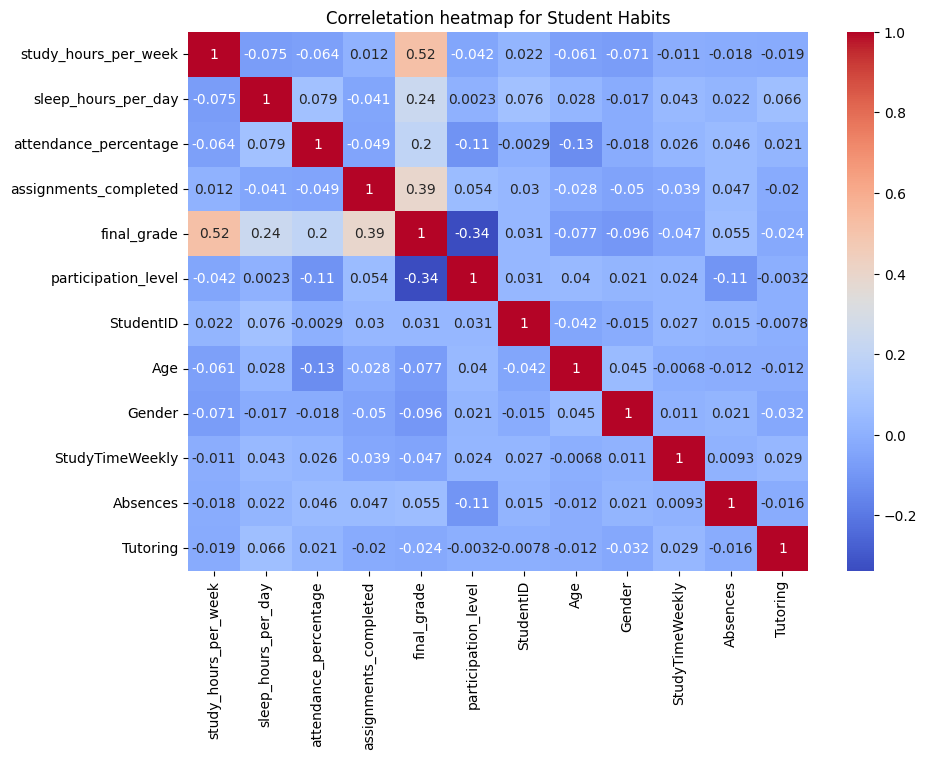

In [ ]:
plt.figure(figsize= (10,7))
corr = data.corr()
sns.heatmap(corr,annot= True, cmap= 'coolwarm')
plt.title("Correletation heatmap for Student Habits")
plt.show()

### Insight: 
- `study_hours_per_week` and `attendance_percentage` show positive correlation with final_grade.

- High absences correlate negatively with final_grade.

### Feature Engineering

A binary target variable was created:

In [ ]:
# Create performance column
data["performance"] = (data['final_grade'] >= 60).astype(int)

### Model Training

The dataset was split into (80:20) ratio 80% for training and 20% for testing the model

In [ ]:

# Split into features and target
X = data.drop(columns=['StudentID', 'performance', 'final_grade'])
y = data['performance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


An **XGBoost Classifier** was implemented inside a **Pipeline** to ensure consistent preprocessing, scaling, and efficient model fitting.

In [ ]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', xgb.XGBClassifier(  n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"))
])

pipeline.fit(X_train, y_train)
print("Accuracy:", pipeline.score(X_test,y_test))


Accuracy: 0.941544885177453


C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [13:14:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Model Evaluation

In [ ]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.941544885177453

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       411
           1       0.81      0.76      0.79        68

    accuracy                           0.94       479
   macro avg       0.89      0.87      0.88       479
weighted avg       0.94      0.94      0.94       479



### Results:

- Accuracy: 94.1%

- F1-score: 0.94

Strong performance on both pass and fail classes.

### Feature Importance

In [ ]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

pipeline = joblib.load("student_prediction_model.pkl")

In [ ]:
xgb_model = pipeline.named_steps['model']
xgb.plot_importance(xgb_model, importance_type='weight', color='teal')
plt.title("Feature Importance - XGBoost", fontsize=14)
plt.xlabel("F-Score")
plt.ylabel("Features")
plt.show()

### Distribution of Final Grades

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(data['final_grade'], kde=True, color='royalblue', bins=20)
plt.title("Distribution of Final Grades", fontsize=14)
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()

### Performance Count Plot

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='performance', data=data, palette='viridis')
plt.title("Pass vs Fail Distribution", fontsize=14)
plt.xlabel("Performance (0 = Fail, 1 = Pass)")
plt.ylabel("Number of Students")
plt.show()

### Confusion Matrix

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title("Confusion Matrix - Student Performance Model")
plt.show()

#### Model Saving

In [ ]:
joblib.dump(pipeline, "student_prediction_model.pkl")

['student_prediction_model.pkl']

### Prediction for New Student

In [ ]:



new_student = pd.DataFrame([{
    "study_hours_per_week": 0.2,
    "sleep_hours_per_day": 0.7,
    "attendance_percentage": 0.2,
    "assignments_completed": 0.3,
    "participation_level": 0,
    "Age": 17,
    "Gender": 1,
    "StudyTimeWeekly": 15,
    "Absences": 2,
    "Tutoring": 1
}])

# Prediction 
prediction = pipeline.predict(new_student)
proba = pipeline.predict_proba(new_student)[0]
confidence = proba[1]  # probability of passing



In [ ]:

confidence = proba[1] * 100  
fail_confidence = (1 - proba[1]) * 100  


if prediction[0] == 1:
    message = f"Our model predicts you'll PASS your next exam  (Confidence: {confidence:.2f}). Keep up the good work!"
else:
    message = f"Our model predicts you might FAIL (Confidence of: {fail_confidence:.2f}%). We recommend studying harder and reviewing past topics."

    #  recommendations from the model
    reasons = []
    if new_student["study_hours_per_week"].iloc[0] < 0.4:
        reasons.append("increase your weekly study hours")
    if new_student["attendance_percentage"].iloc[0] < 0.7:
        reasons.append("improve your class attendance")
    if new_student["assignments_completed"].iloc[0] < 0.5:
        reasons.append("complete more assignments/quiz on time")
    if new_student["sleep_hours_per_day"].iloc[0] < 0.5:
        reasons.append("maintain better sleep schedule")

    if reasons:
        message += " To improve, try to " + ", ".join(reasons) + "."

print(message)


Our model predicts you might FAIL (Confidence of: 59.11%). We recommend studying harder and reviewing past topics. To improve, try to increase your weekly study hours, improve your class attendance, complete more assignments/quiz on time.


 🧩 Result Message

> **"Our model predicts you might FAIL (Confidence: 59.11%).**  
> We recommend studying harder and reviewing past topics.  
> To improve, try to increase study hours, improve attendance, and complete assignments on time."
